In [11]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 2000)
pd.set_option("display.max_row", 5000)

In [26]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    palette = {"Ridge":"C0", "Multitask Ridge": "C0", "PLS": "C1", "Random Forest": "C2", "CCA": "C3", "Neural Network": "C4",
               "Neural Network (Linear)": "C5", "SVR-RBF": "C7", "XGBoost": "C6"}
    
    g = sns.catplot(x="Domain", y="Score", hue="Model", palette=palette, col="alpha",
                    data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")
        ax.axhline(0.2, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-0.2, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.3, 1.1))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    score_df = score_df[score_df["Data mul factor"] == "No mixup"]
    
    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():

            filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type)]

            title = title_prefix + metric + " - " + score_type

            plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order, hue_order=hue_order)

In [76]:
def plot_scores_mixup(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Data mul factor", col_order=col_order,
                     data=score_df, ci="sd", kind="bar", hue_order=hue_order)
#                     row="% Data (train)",, row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-1, 0.2))
        plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.05, 1.0))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores_mixup(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():
            
            for model in score_df["Model"].unique():

                filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                         & (score_df["Model"] == model)]

                title = title_prefix + metric + " - " + score_type + " - " + model

                plot_scores_mixup(filtered_data, metric, score_type, title, save_folder, col_order=col_order, hue_order=hue_order)

In [6]:
results_dir = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/results/"

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Single output

In [54]:
ridge = pd.read_hdf(results_dir + 'unfiltered_with_prior_stroke/singleoutput/pca/results_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='r')
bpridge = pd.read_hdf(results_dir + 'unfiltered_with_prior_stroke/singleoutput/pca/best_params_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='r')

rf = pd.read_hdf(results_dir + 'unfiltered_with_prior_stroke/singleoutput/pca/results_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='r')
bprf = pd.read_hdf(results_dir + 'unfiltered_with_prior_stroke/singleoutput/pca/best_params_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='r')


In [56]:
scores = pd.concat([ridge, rf], ignore_index=True, sort=False)
bp = pd.concat([bpridge, bprf], ignore_index=True, sort=False)

In [57]:
scores_filtered = scores[(scores["% Data"] == 100.0) & (scores["% Data (train)"] == 100.0)]

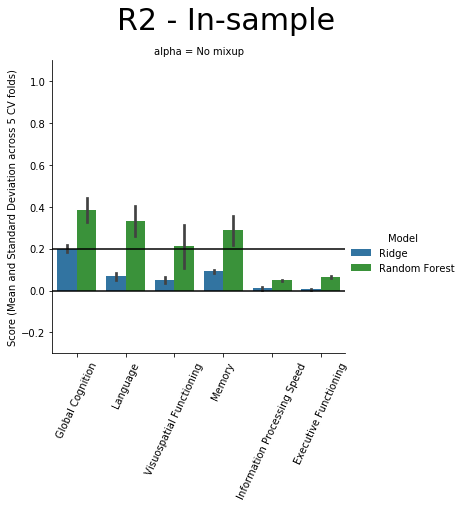

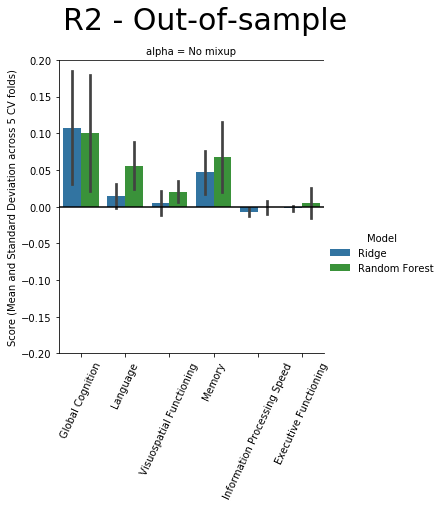

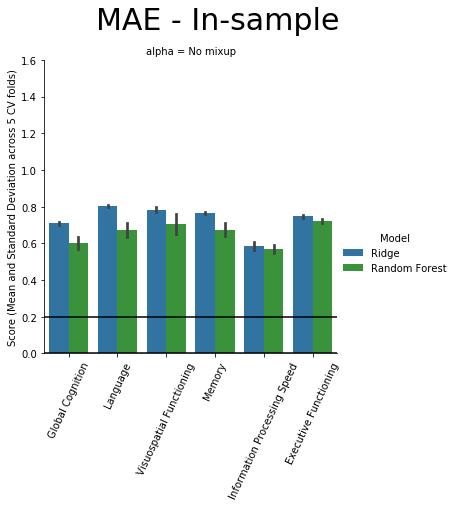

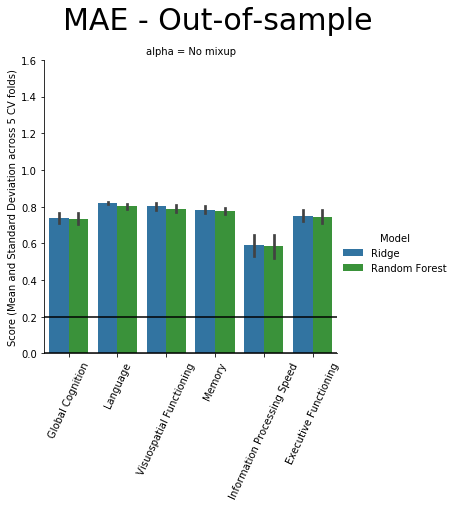

In [58]:
plot_all_scores(scores_filtered)

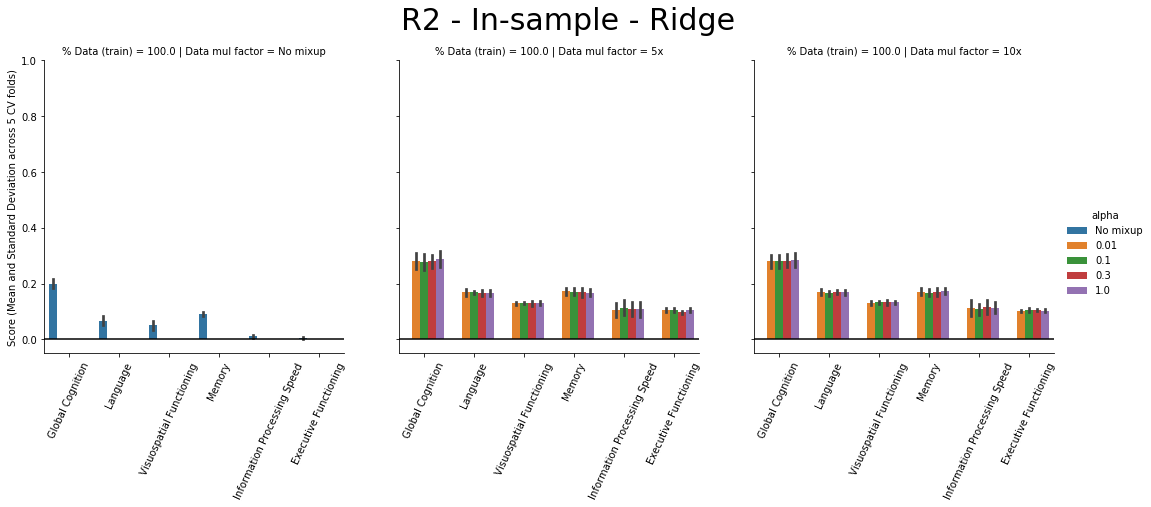

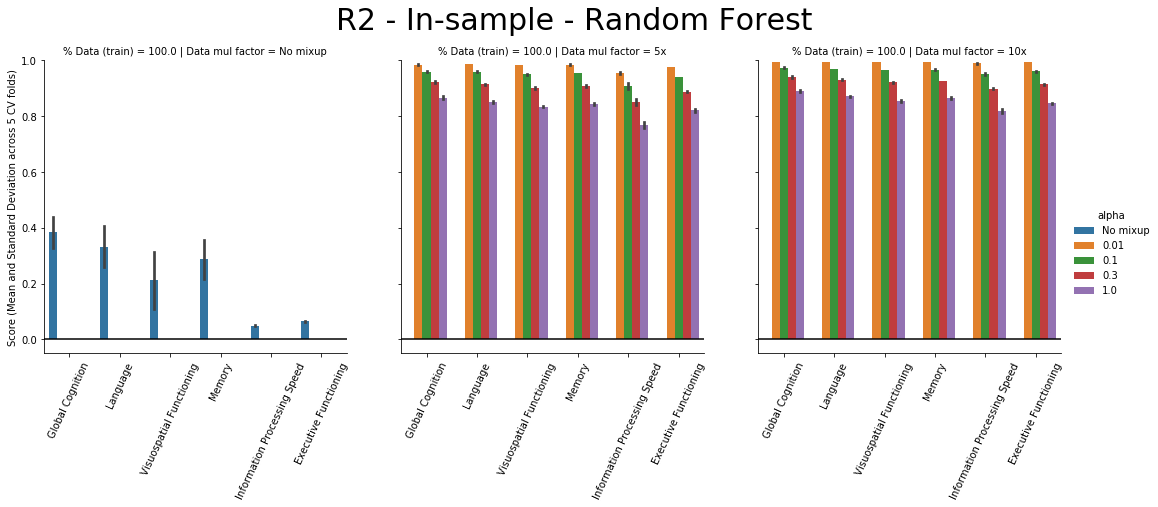

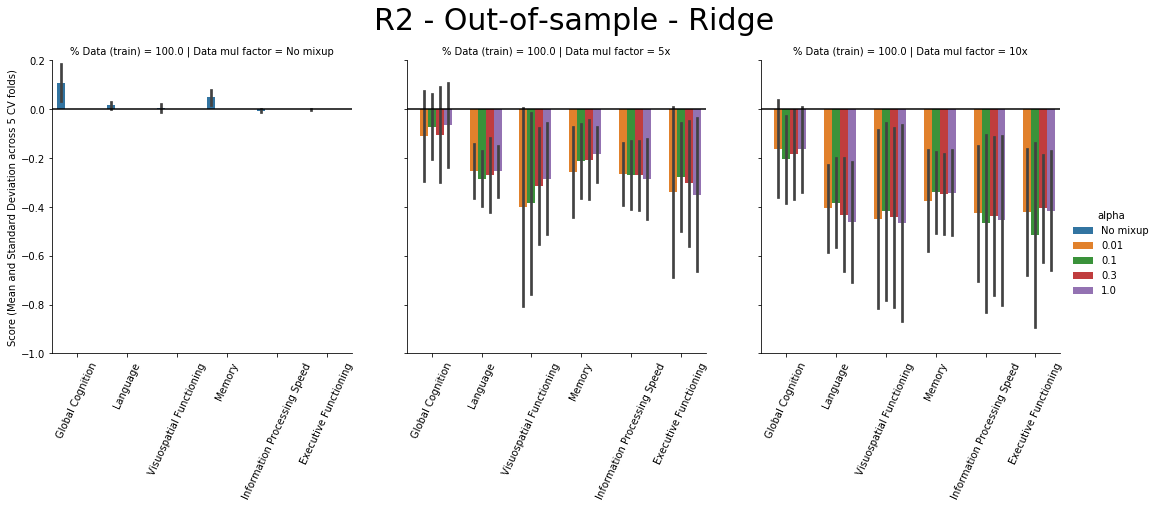

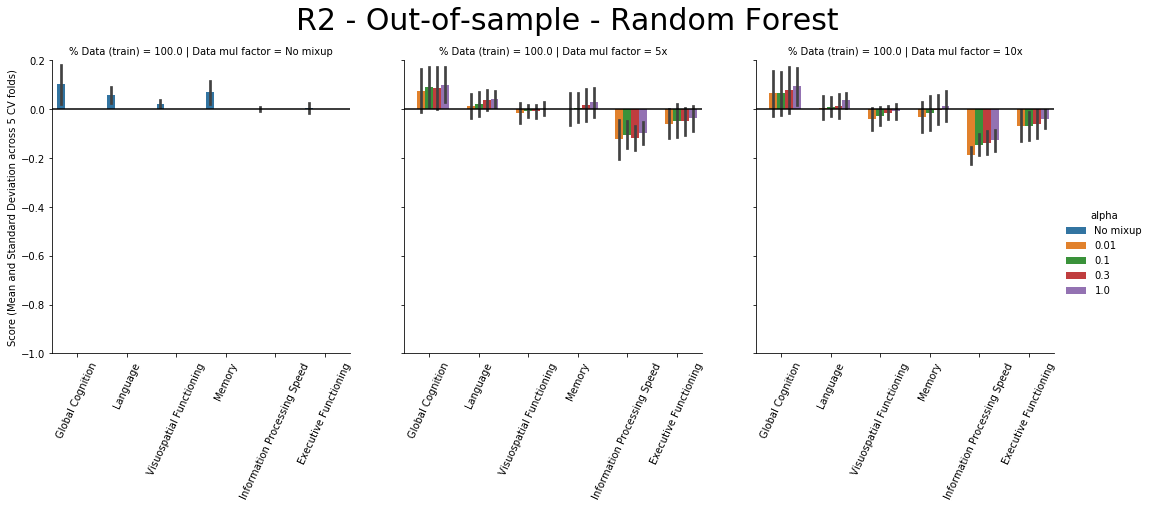

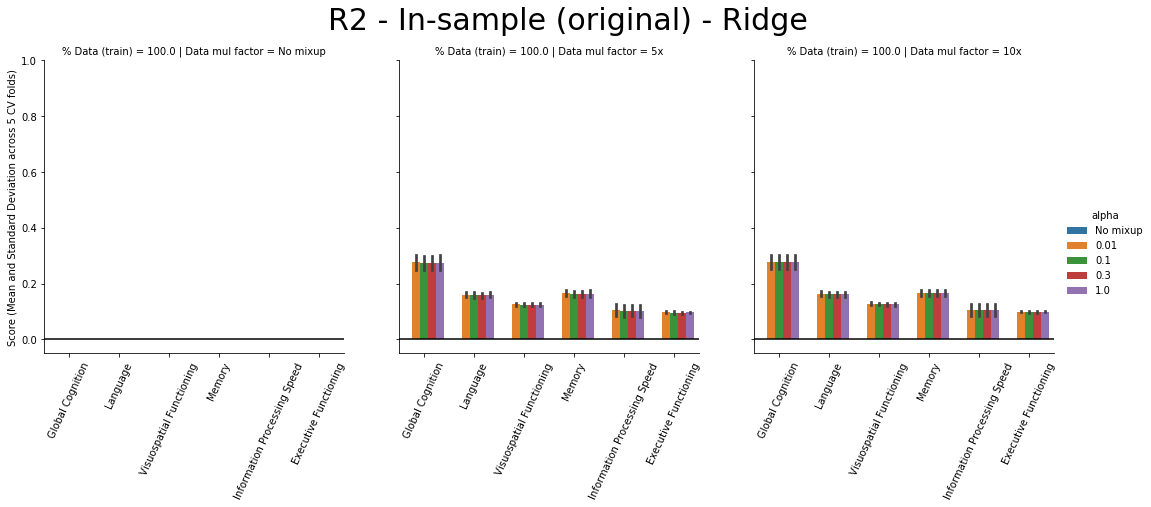

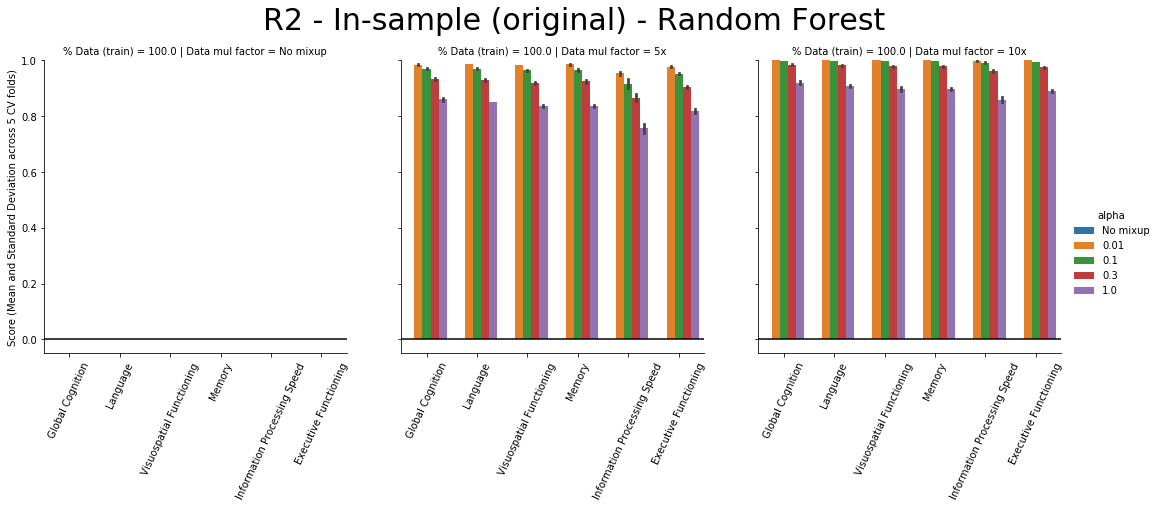

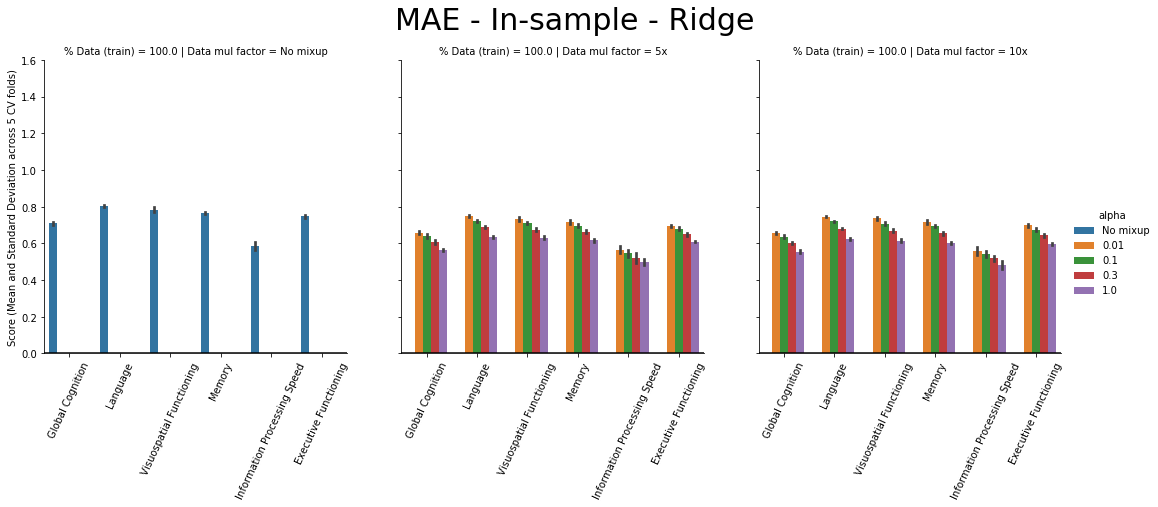

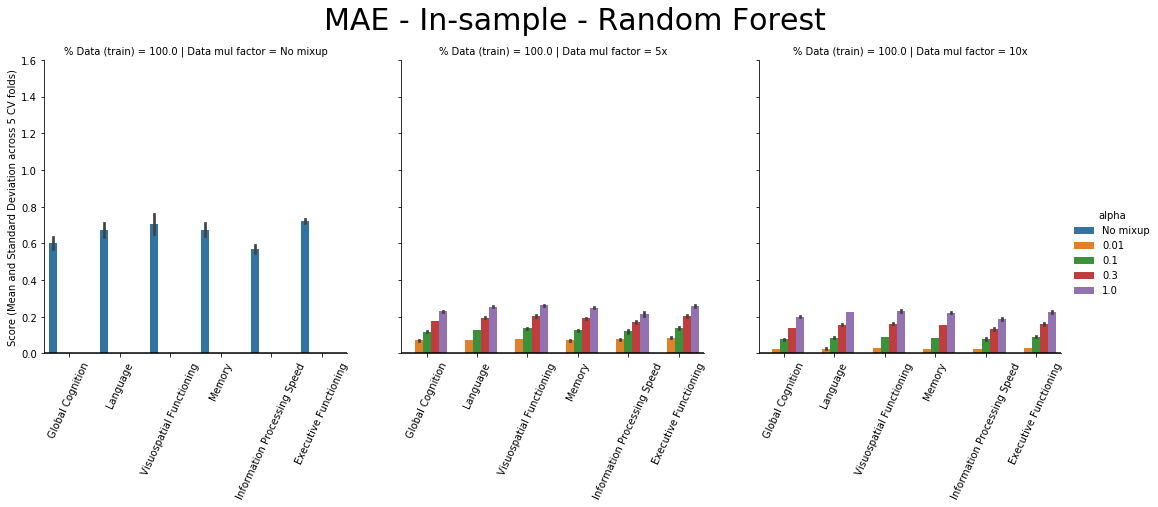

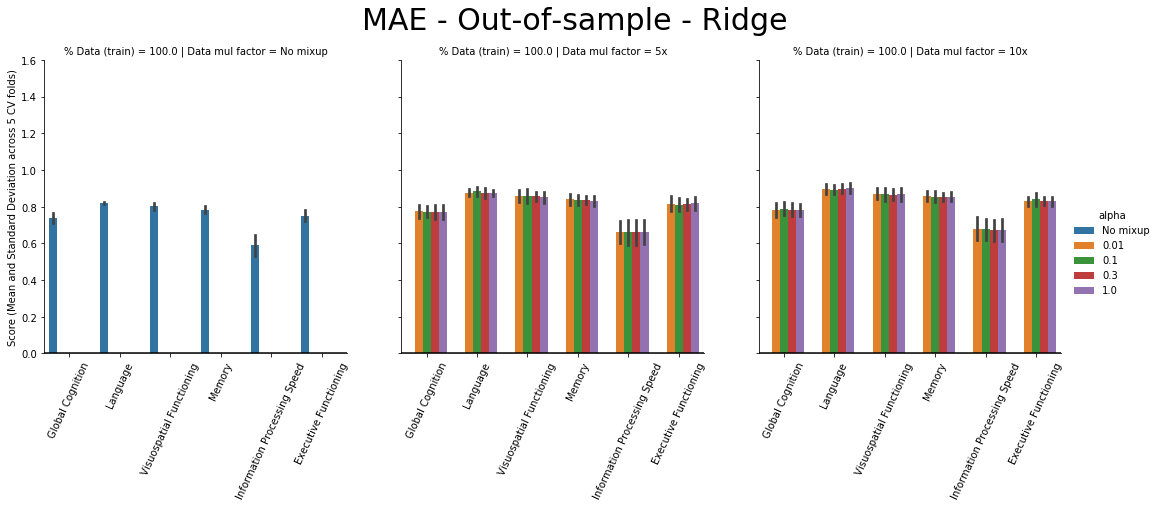

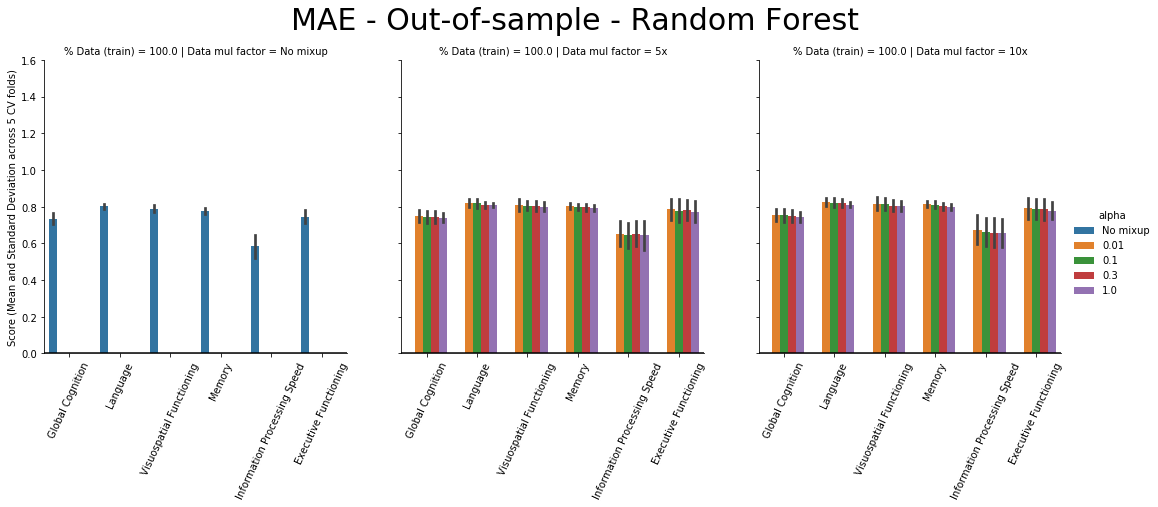

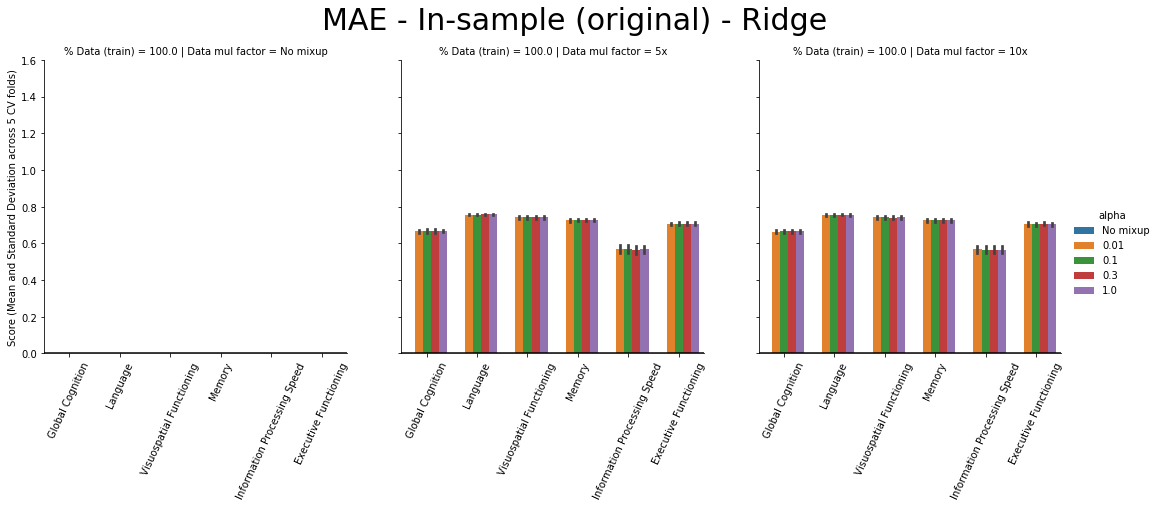

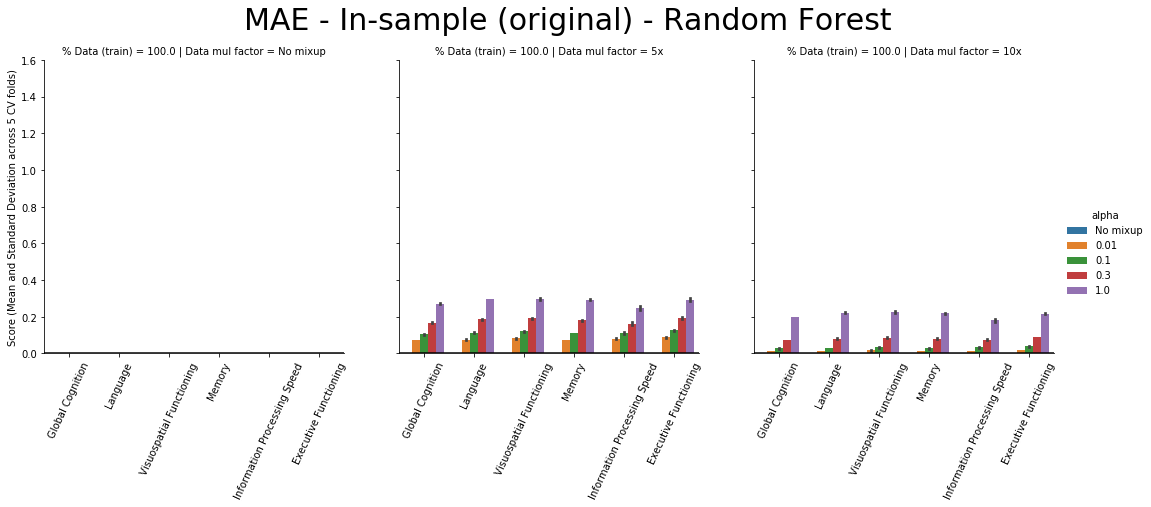

In [71]:
plot_all_scores_mixup(scores_filtered, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

In [60]:
scores_filtered["Data mul factor"].unique()

array(['5x', '10x', 'No mixup', '50x'], dtype=object)

## Multi output

In [18]:
allmodels = pd.read_hdf(results_dir + 'unfiltered_with_prior_stroke/multioutput/pca/results_pca_100_multioutput_mixup_all.h5', key='p', mode='r')

In [22]:
# allmodels

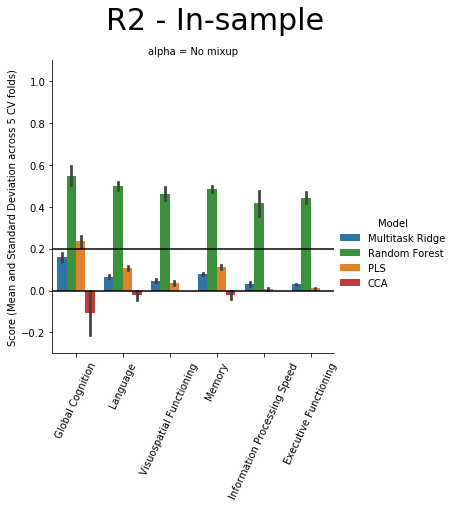

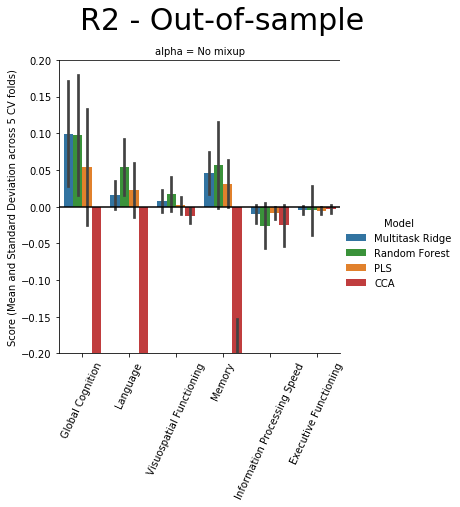

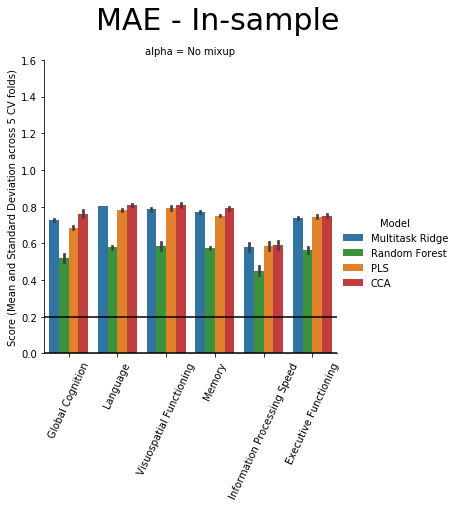

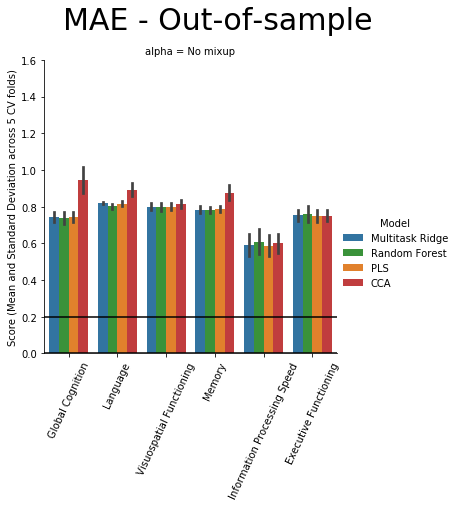

In [28]:
plot_all_scores(allmodels)

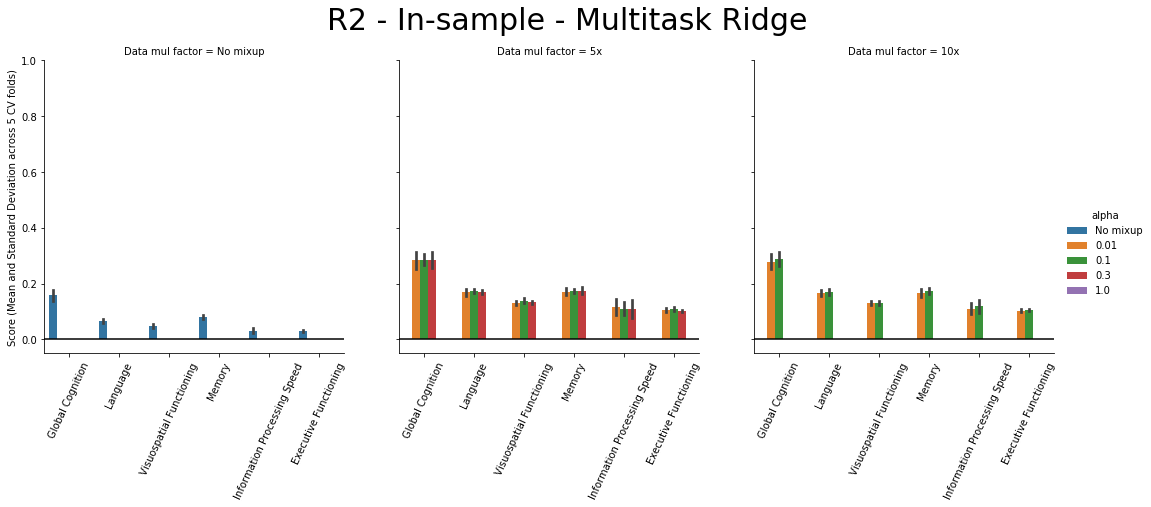

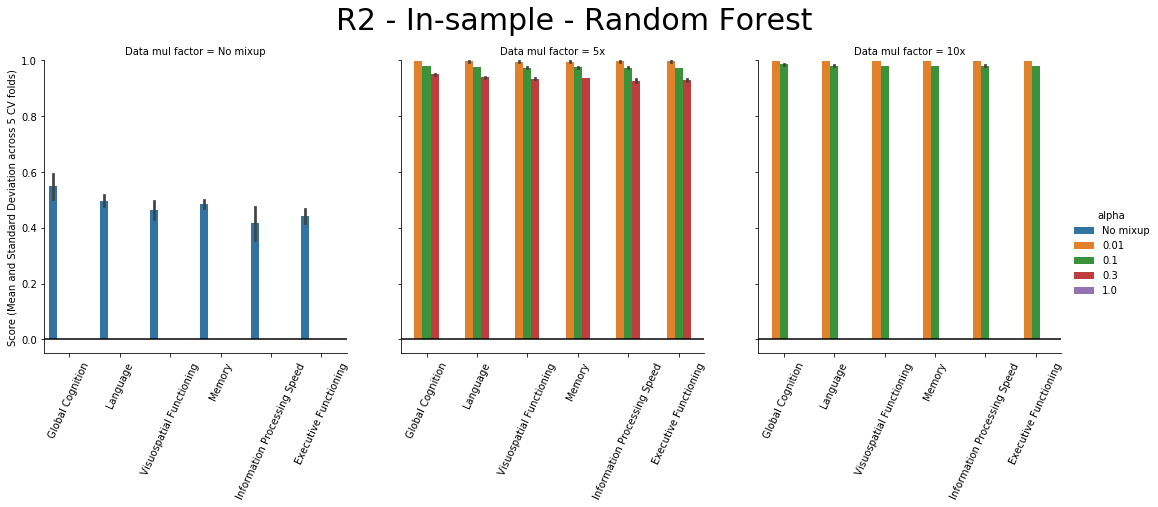

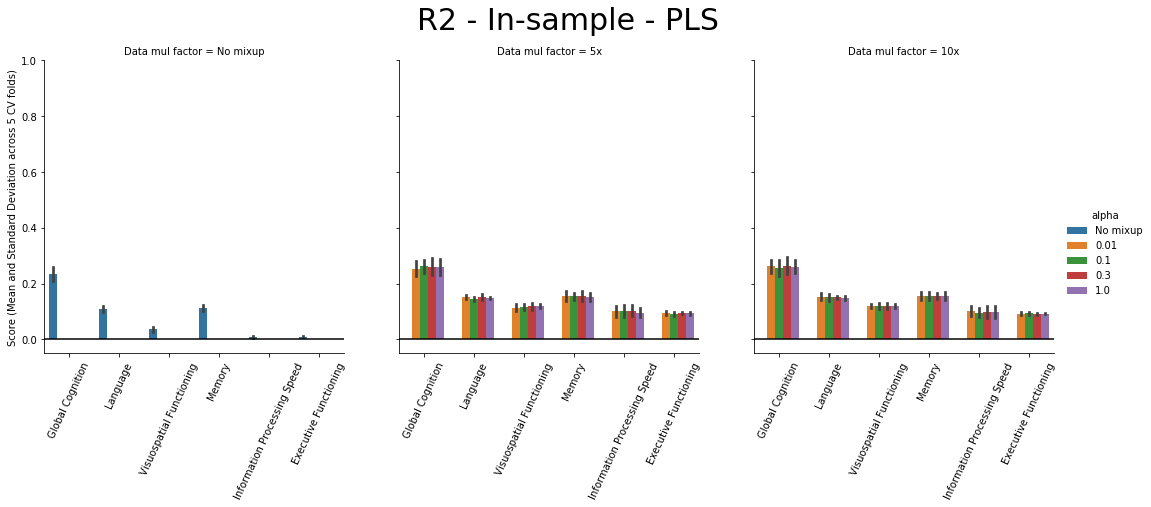

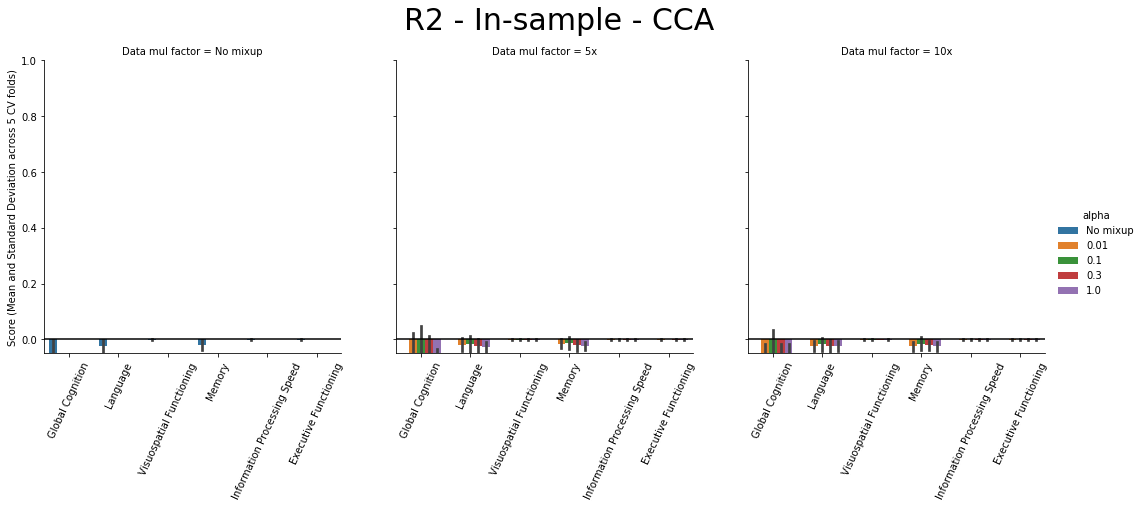

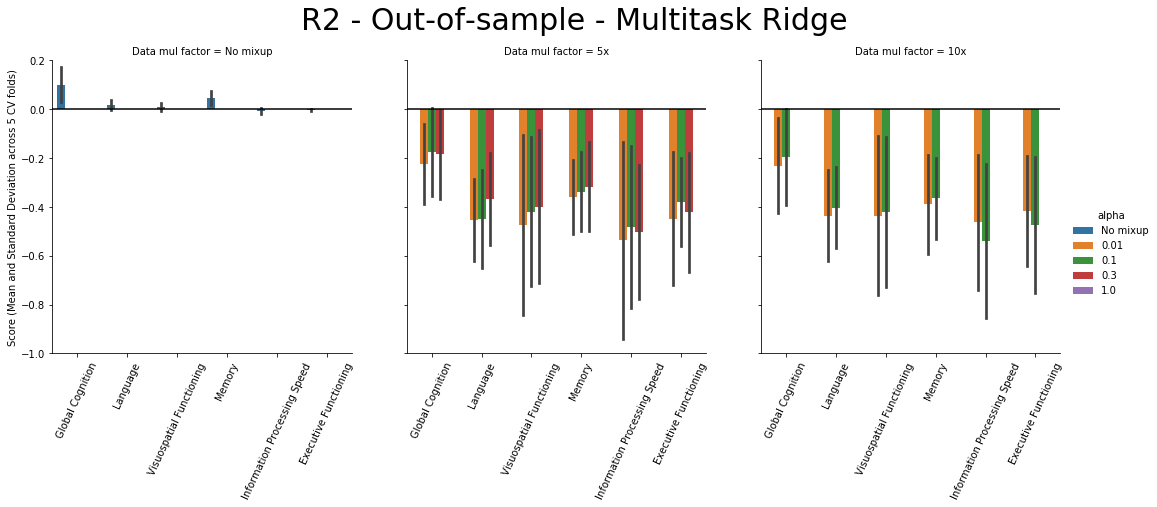

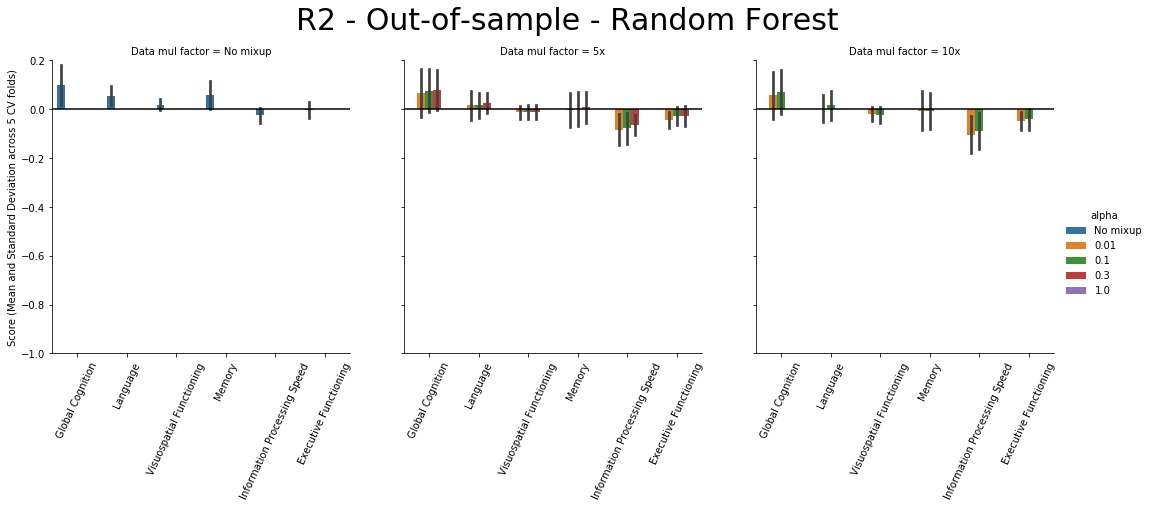

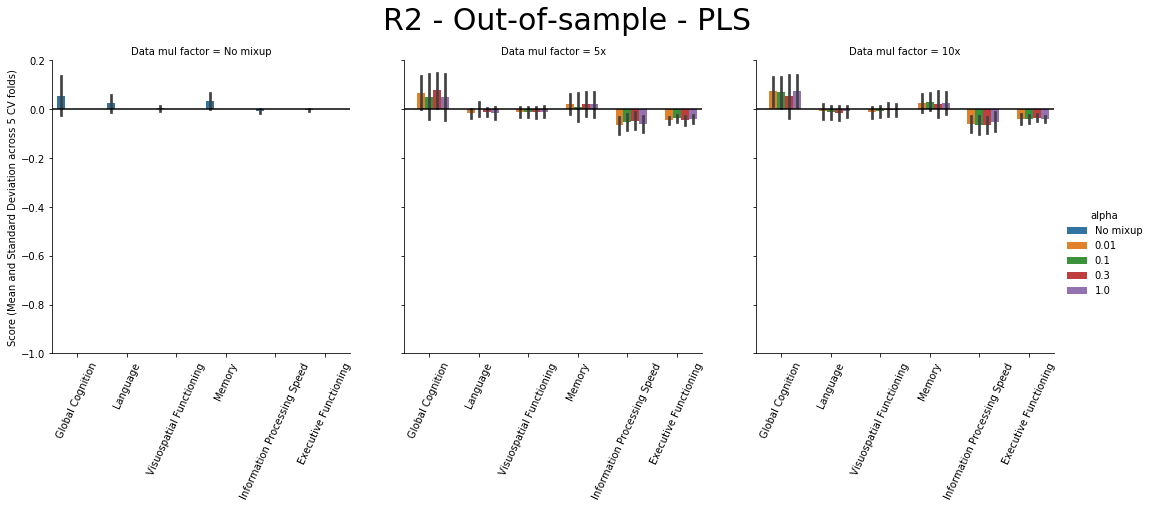

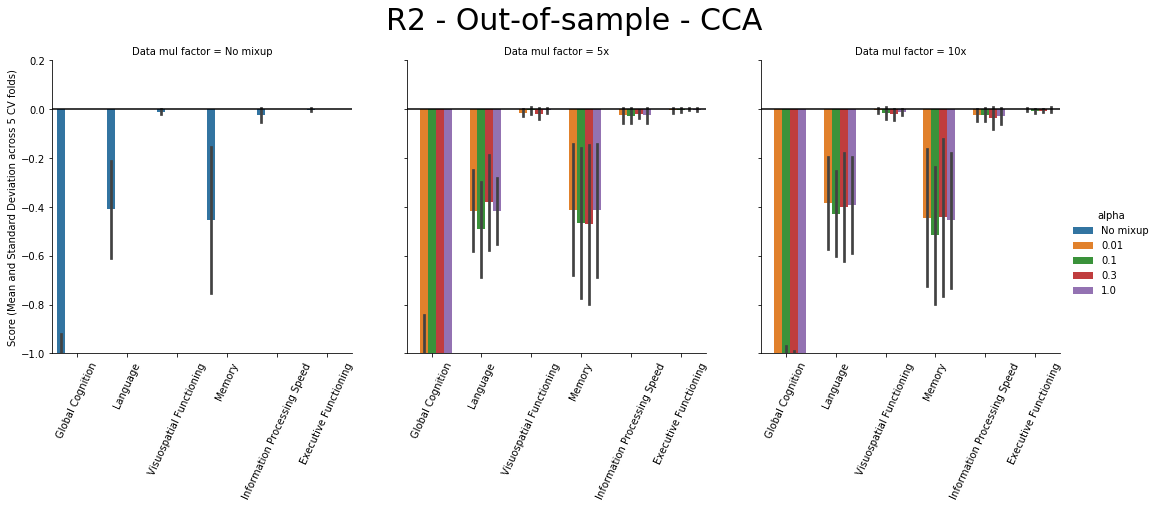

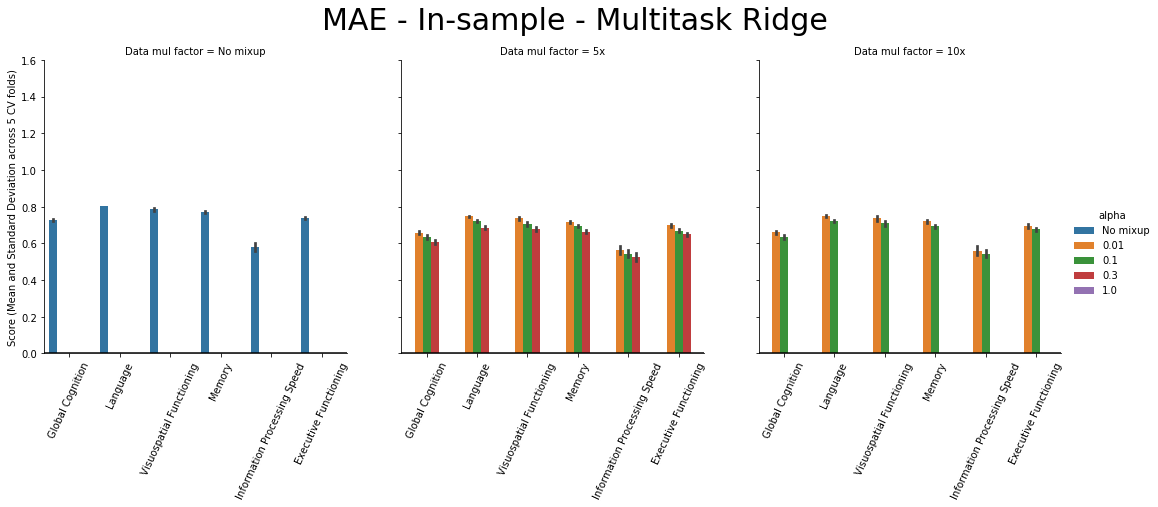

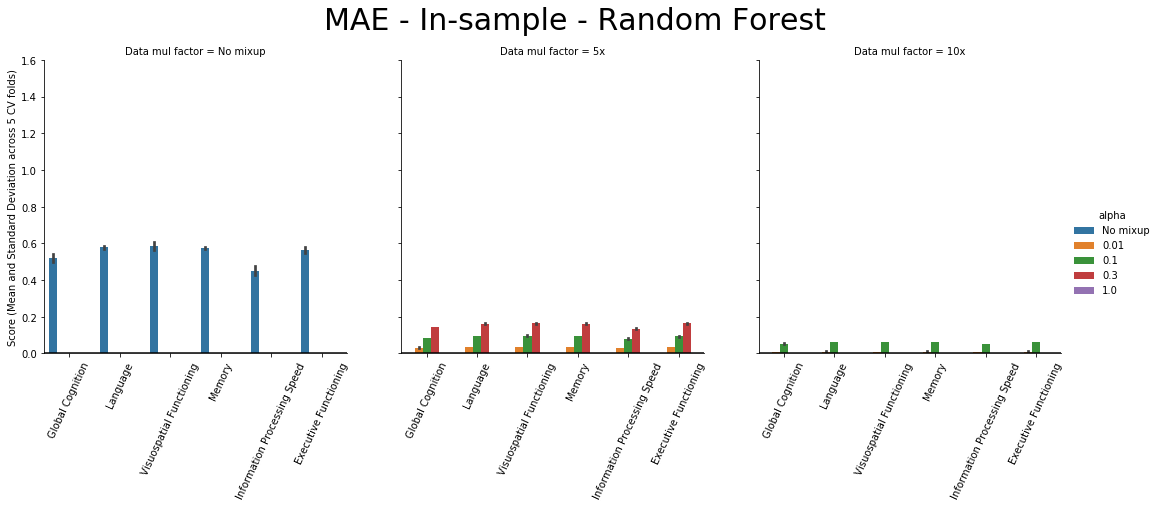

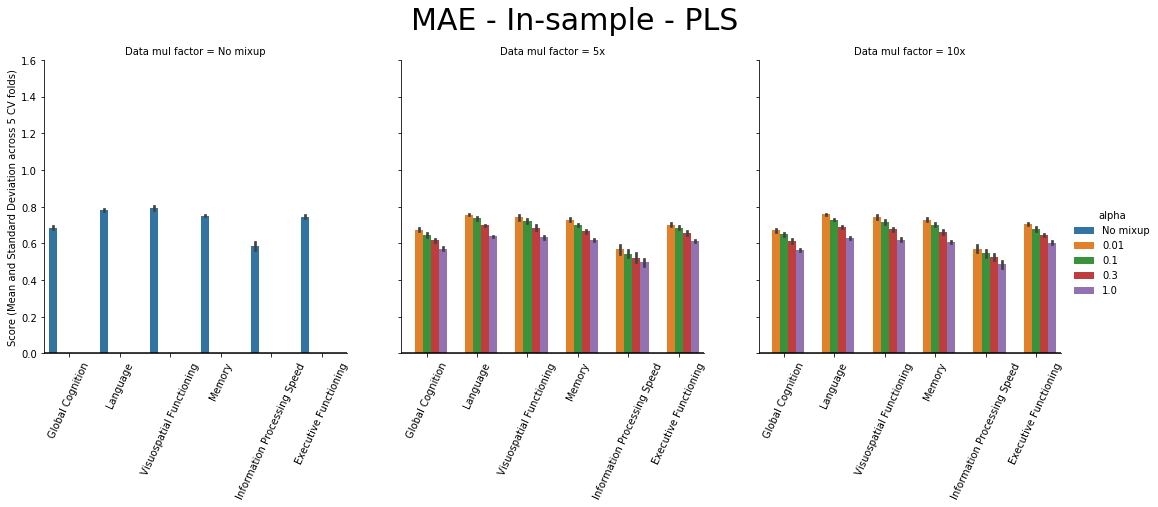

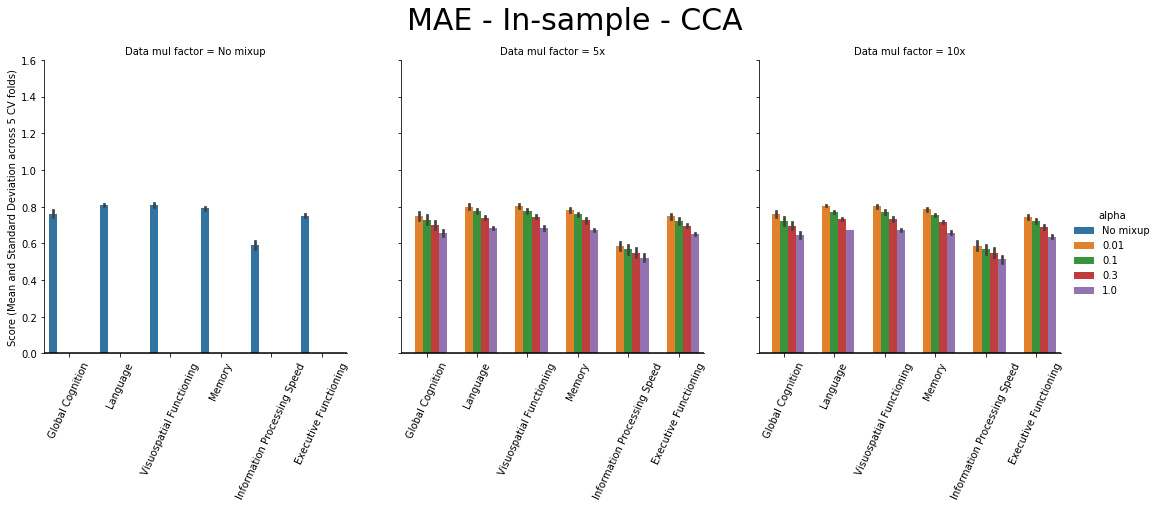

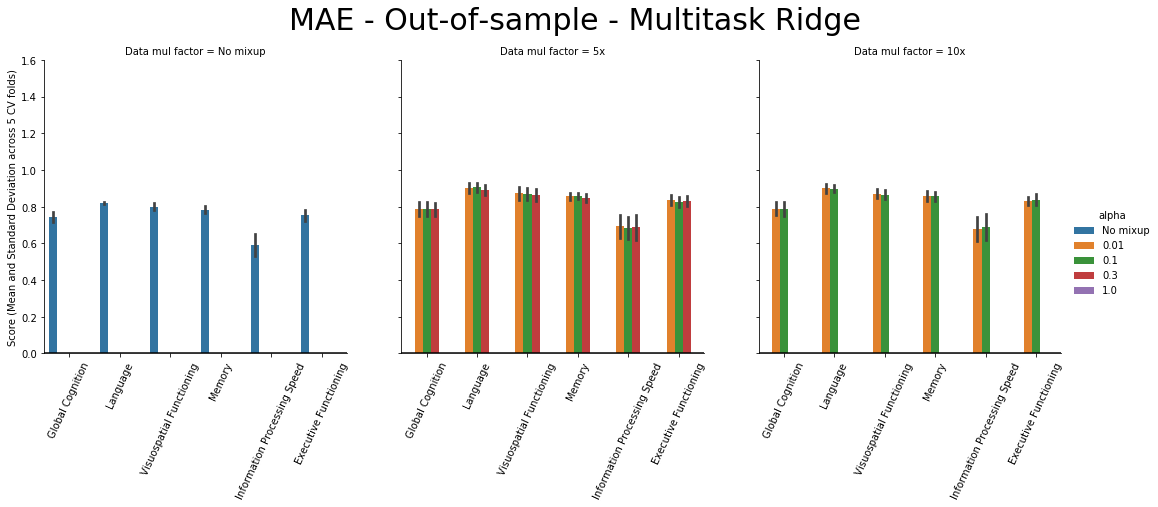

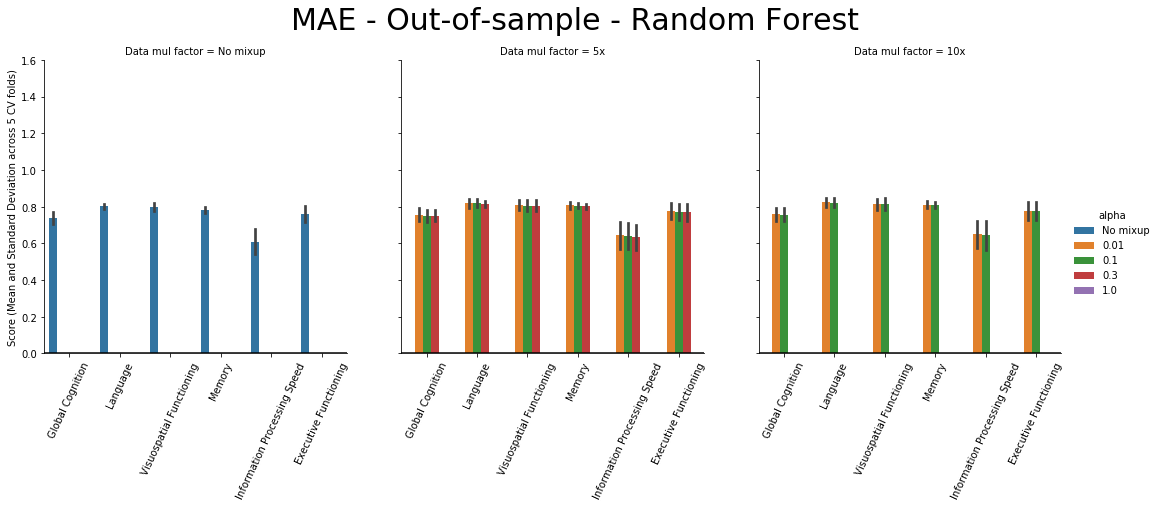

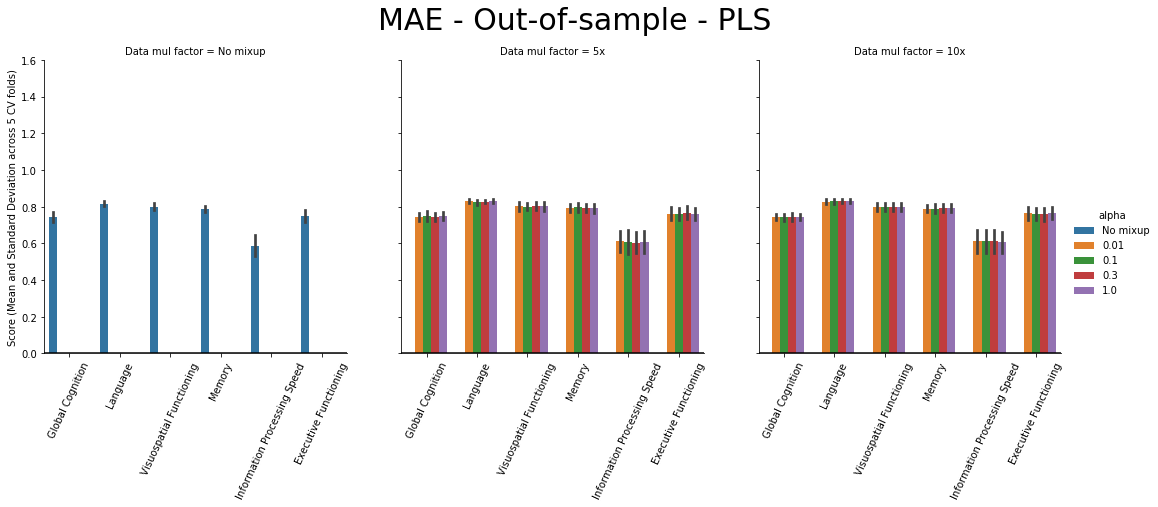

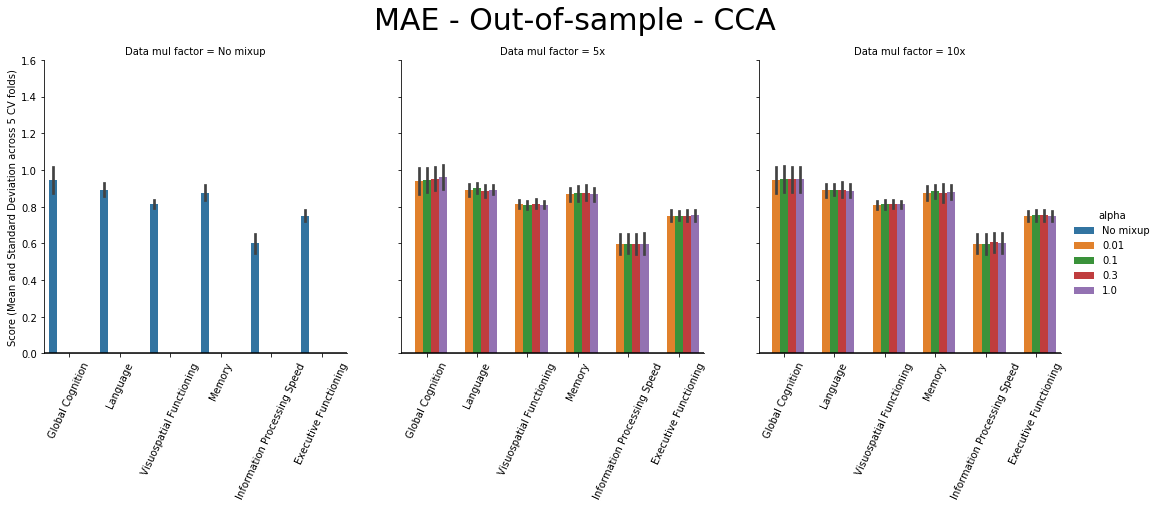

In [77]:
plot_all_scores_mixup(allmodels, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

In [79]:
allmodels["Score type"].head()

0        In-sample
1    Out-of-sample
2        In-sample
3    Out-of-sample
4        In-sample
Name: Score type, dtype: object